In [1]:
#create a rootDir and initialize ee and set up a map
import ee 
import os
import geemap

ee.Initialize()

rootDir = os.path.expanduser('~') + '/'
resultDir = rootDir + 'gfc_results/'

Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

In [2]:
#load false aoi
from utils import utils
asset = 'users/bornToBeAlive/aoi_PU'
aoi_name = utils.get_aoi_name(asset)

#display on the map
aoi = ee.FeatureCollection(asset)
Map.addLayer(aoi, {}, 'aoi_name')   
Map.centerObject(aoi, 8)

In [3]:
#create the shp file 
from scripts import make_aoi_shp

make_aoi_shp.make_aoi_shp(asset)

'/home/prambaud/gfc_wrapper_results/downloads/PU.shp'

In [4]:
from scripts import download_merge_glad as dmg
from scripts import download_merge_tandem as dmt
from utils import parameters as pm
from utils import utils
import os

#create false aoi
asset = 'users/bornToBeAlive/aoi_PU'
aoi_name = utils.get_aoi_name(asset)


dwnl_dir = pm.getDwnDir()

#load the Hansen_GFC-2019-v1.7
types = pm.getTypes()
prefix = "https://storage.googleapis.com/earthenginepartners-hansen/GFC-2019-v1.7/Hansen_GFC-2019-v1.7_"
for type in types:
    pattern = prefix + type + "_{0}_{1}.tif"
    name = aoi_name+'_' + type
    dmg.download_merge(asset, pattern, name)
    
#load the tcc2010
prefix = "https://glad.umd.edu/Potapov/TCC_2010/treecover2010_"
pattern = prefix + '{0}_{1}.tif'
name = aoi_name+'_'+'treecover2010'
dmg.download_merge(asset, pattern, name)

#load the tandem tiles
pattern = "https://download.geoservice.dlr.de/FNF50/files/"
name = aoi_name+'_'+'tandem'
dmt.download_merge(asset, pattern, dwnl_dir, name)

'/home/prambaud/gfc_wrapper_results/downloads/PU_tandem.tif'

In [5]:
from scripts import make_map_Glad2010

#create false aoi
asset = 'users/bornToBeAlive/aoi_PU'
threshold = 20

file = make_map_Glad2010.make_map_Glad2010(asset, threshold)

the minimum raster value is:  0
the maximum raster value is:  8


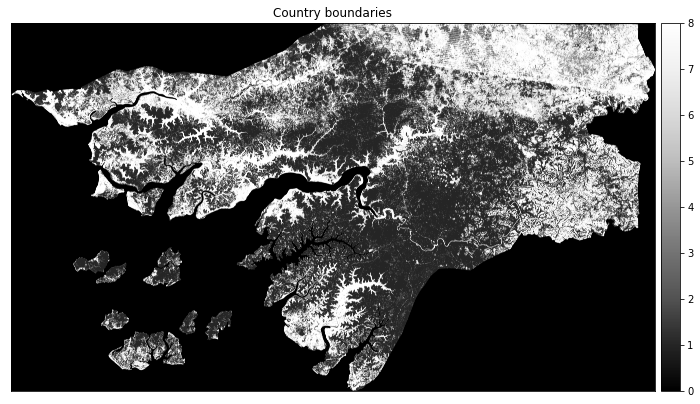

AttributeError: 

The image argument in 'addLayer' function must be an instace of one of ee.Image, ee.Geometry, ee.Feature or ee.FeatureCollection.

In [6]:
import gdal
import osr
from utils import utils
import folium
import rasterio as rio
from utils import parameters as pm
import earthpy.plot as ep
import matplotlib.pyplot as plt
import numpy as np

m = folium.Map(location=[12.035091, -15.005509], zoom_start = 8)

raster = pm.getGfcDir() + 'PU_glad_check.tif'

#rio.mask.mask(nodata=255)

# Use rasterio to import the reprojected data as img
with rio.open(raster) as src:
    img = src.read()
    
img[img == 255] = 0
    
print("the minimum raster value is: ", np.nanmin(img))
print("the maximum raster value is: ", np.nanmax(img))
    
ax = ep.plot_bands(img[0],
              title="Country boundaries",
              scale=True)

plt.show()

asset = 'users/bornToBeAlive/aoi_PU'
bb = utils.get_bounding_box(asset)
bounds = [[bb['miny'], bb['minx']], [bb['maxy'], bb['maxx']]]

image = folium.raster_layers.ImageOverlay(img[0], bounds=bounds)


Map.addLayer(image)
m

In [ ]:
from scripts import make_map_threshold

#create false aoi
asset = 'users/bornToBeAlive/aoi_PU'
threshold = 20

make_map_threshold.make_map_threshold(asset, threshold)

In [ ]:
from scripts import make_map_threshold_clump

#create false aoi
asset = 'users/bornToBeAlive/aoi_PU'
threshold = 20

make_map_threshold_clump.make_map_threshold_clump(asset, threshold)

In [ ]:
from scripts import compute_areas
import pandas as pd

#create false aoi
asset = 'users/bornToBeAlive/aoi_PU'
threshold = 20

file = compute_areas.compute_areas(asset, threshold)

df = pd.read_csv(file)
df

In [ ]:
#######################################
#####   probleme de taille lié  à la val max (mer 255)
######################################


#from scripts import compute_areas_by_zone
#
##create false aoi
#asset = 'users/bornToBeAlive/aoi_PU'
#threshold = 20
#
#compute_areas_by_zone.compute_areas_by_zone(asset, threshold)

In [ ]:
from scripts import compute_area_glad_2010
import pandas as pd

#create false aoi
asset = 'users/bornToBeAlive/aoi_PU'
threshold = 20

file = compute_area_glad_2010.compute_area_glad_2010(asset, threshold)
df = pd.read_csv(file)
df